In [1]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 5))
mpl.rc('image', cmap='gray')



In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp

Frame([[[24, 26, 23],
        [27, 29, 26],
        [34, 36, 33],
        ...,
        [74, 76, 73],
        [83, 85, 82],
        [79, 81, 78]],

       [[14, 16, 13],
        [15, 17, 14],
        [21, 23, 20],
        ...,
        [66, 68, 65],
        [72, 74, 71],
        [69, 71, 68]],

       [[11, 13, 10],
        [11, 13, 10],
        [15, 17, 14],
        ...,
        [58, 60, 57],
        [53, 55, 52],
        [53, 55, 52]],

       ...,

       [[67, 69, 66],
        [65, 67, 64],
        [63, 65, 62],
        ...,
        [57, 59, 56],
        [53, 55, 52],
        [52, 54, 51]],

       [[69, 71, 68],
        [67, 69, 66],
        [69, 71, 68],
        ...,
        [80, 82, 79],
        [70, 72, 69],
        [62, 64, 61]],

       [[70, 72, 69],
        [64, 66, 63],
        [67, 69, 66],
        ...,
        [49, 51, 48],
        [52, 54, 51],
        [46, 48, 45]]], dtype=uint8)
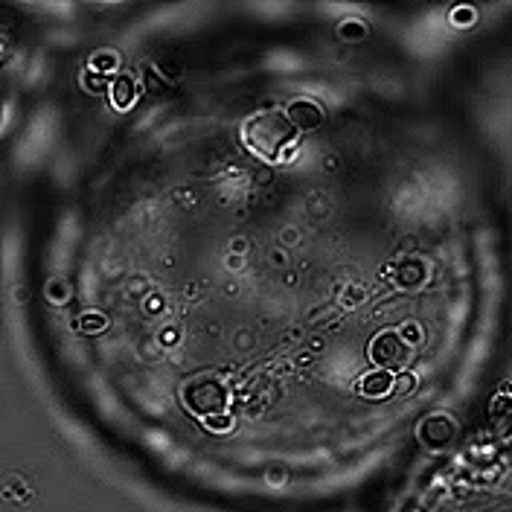

In [29]:
video = pims.PyAVVideoReader('preprocessed/filter_lam32_1.avi')
video[0]

In [31]:
@pims.pipeline
def gray(image):
    return image[:, :, 1]

frames = gray(pims.open('preprocessed/filter_lam32_1.avi'))

Frame([[26, 29, 36, ..., 76, 85, 81],
       [16, 17, 23, ..., 68, 74, 71],
       [13, 13, 17, ..., 60, 55, 55],
       ...,
       [69, 67, 65, ..., 59, 55, 54],
       [71, 69, 71, ..., 82, 72, 64],
       [72, 66, 69, ..., 51, 54, 48]], dtype=uint8)
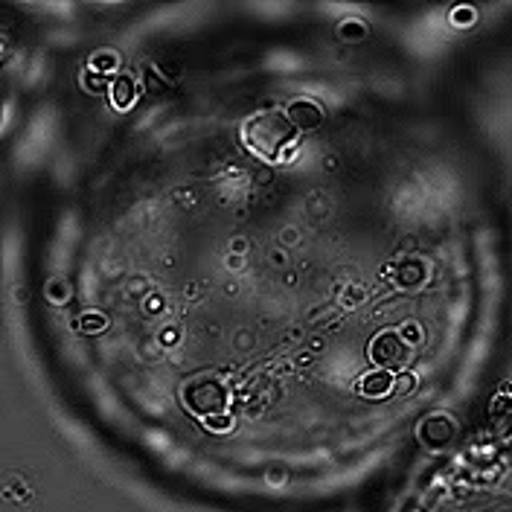

In [32]:
frames[0]

In [74]:
f = tp.locate(frames[0], 3, invert=True, minmass=30)

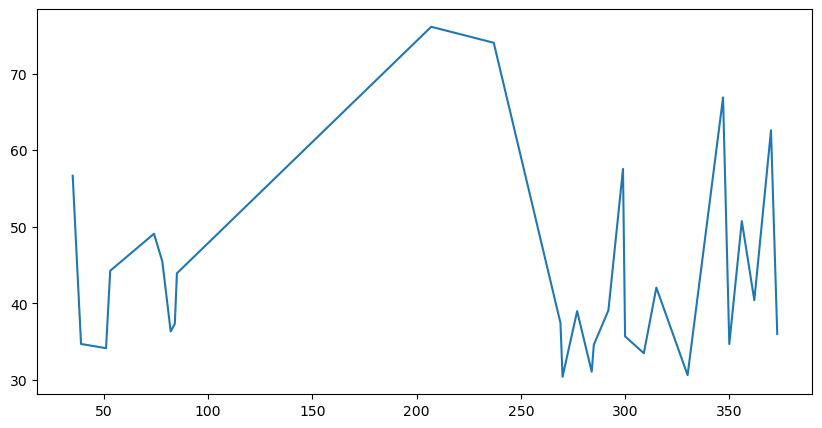

In [75]:
plt.plot(f["mass"])

In [76]:
f.head()

,y,x,mass,size,ecc,signal,raw_mass,ep,frame
35,23.021318,31.829457,56.674685,0.820049,0.812680,18.562058,294.0,-0.039232,0
39,24.810127,37.291139,34.707753,0.791570,0.989899,12.960490,658.0,-0.075078,0
51,33.871383,37.000000,34.158579,0.769181,0.309783,13.949002,852.0,-0.146341,0
53,35.987593,44.054591,44.263368,0.835027,0.459075,13.399829,391.0,-0.044952,0
74,48.836689,99.798658,49.096093,0.817865,0.498328,16.255530,208.0,-0.035255,0


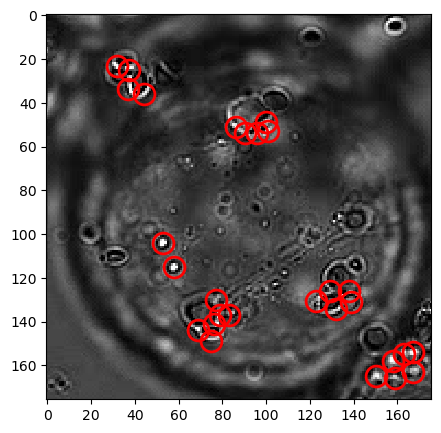

In [77]:
tp.annotate(f, frames[0]);

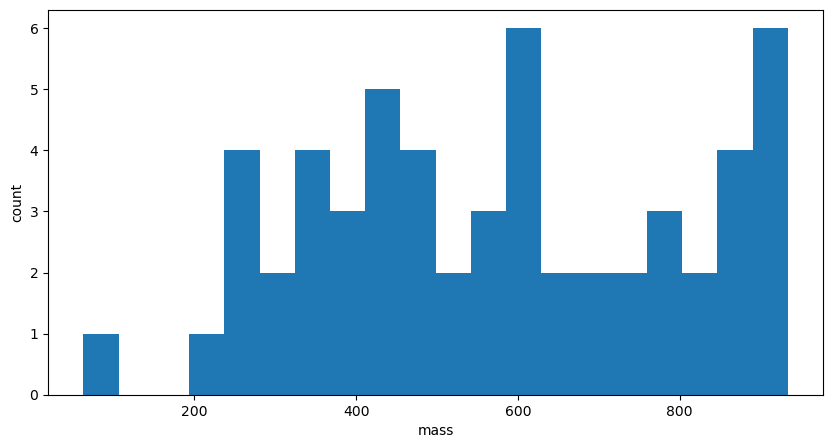

In [12]:
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)

# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count');

In [26]:
f = tp.locate(frames[0], 11, invert=False, minmass=20)

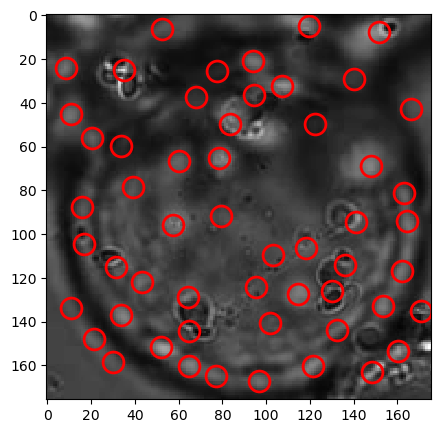

In [27]:
tp.annotate(f, frames[200]);

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>]], dtype=object)

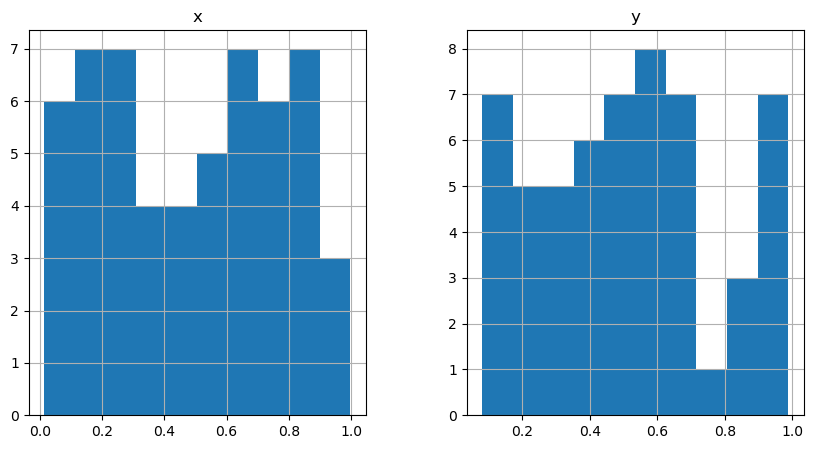

In [15]:
tp.subpx_bias(f)

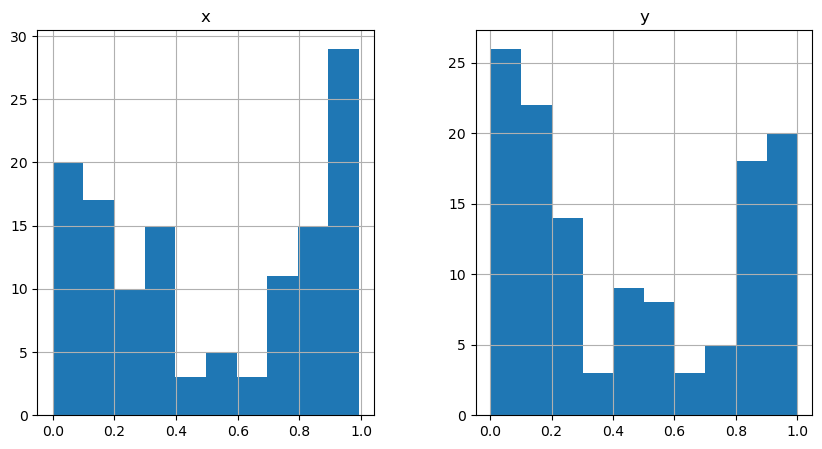

In [16]:
tp.subpx_bias(tp.locate(frames[0], 7, invert=True, minmass=20));

In [17]:
f = tp.batch(frames[:], 11, minmass=20, invert=True, processes=1);

Frame 499: 57 features


In [18]:
t = tp.link(f, 11, memory=3)

Frame 499: 57 trajectories present.


In [19]:
t1 = tp.filter_stubs(t, 25)
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

Before: 648
After: 180


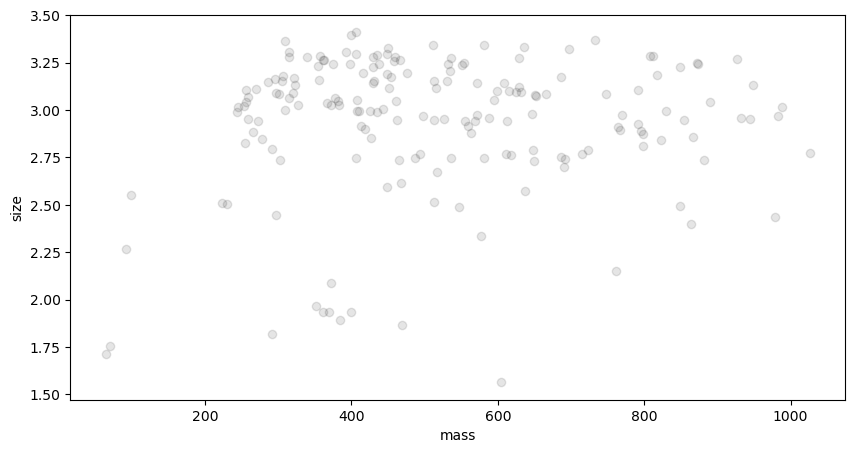

In [20]:
plt.figure()
tp.mass_size(t1.groupby('particle').mean()); # convenience function -- just plots size vs. mass

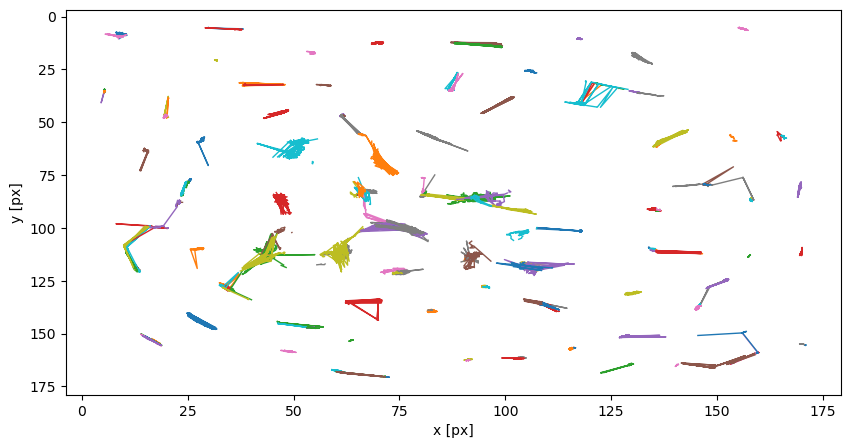

In [21]:
plt.figure()
tp.plot_traj(t1);

In [22]:
d = tp.compute_drift(t1)

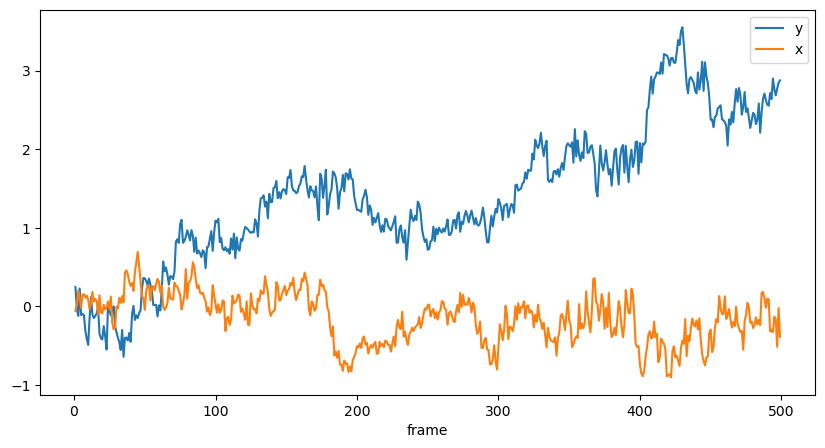

In [23]:
d.plot()
plt.show()

In [24]:
tm = tp.subtract_drift(t1.copy(), d)

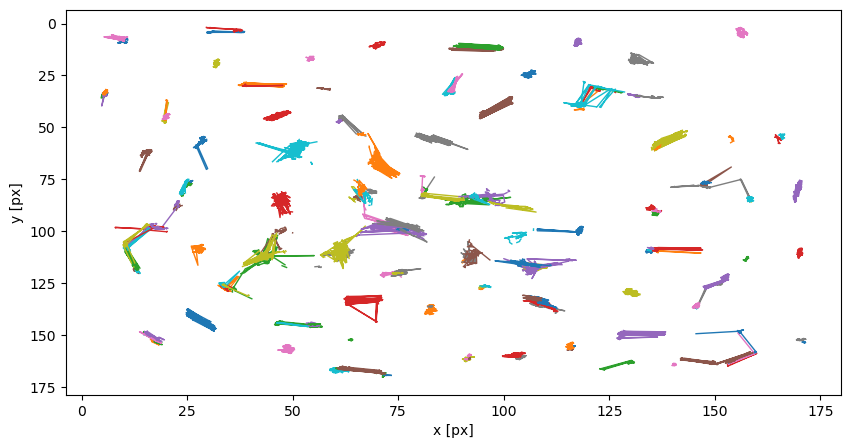

In [25]:
ax = tp.plot_traj(tm)
plt.show()

In [26]:
with tp.PandasHDFStore('data.h5') as s:
    tp.batch(frames, 101, invert=True, output=s, processes=1)

Frame 510: 95 features


In [1]:
import cv2
import h5py
import trackpy as tp

In [2]:
with tp.PandasHDFStore('data.h5') as s:
    frames_result = s.get(2)

    print(frames_result)


              y            x          mass       size       ecc     signal  \
0     50.587078   849.560608   4585.387055  33.153474  0.110163   7.780282   
1    114.413028  1532.628155  42672.980015  29.046598  0.332627  36.100509   
2    133.682567  1055.239621  22645.289062  33.062904  0.196758   8.402705   
3    198.610177   855.320203   8421.688549  29.831562  0.136519   6.535437   
4    213.041218   733.499371  28714.220306  30.177809  0.440004  28.942649   
..          ...          ...           ...        ...       ...        ...   
93  1957.965728   539.320115  14565.310502  28.995720  0.242475  14.626930   
94  1930.974402   368.971293  14114.987774  33.638454  0.322207  15.249353   
95  1965.241635  1075.300994   9709.792053  34.443804  0.284786   6.535437   
96  2000.052774  1756.594082   7477.473514  31.201493  0.336573   4.668169   
97  1988.247930   747.681959  71239.686173  25.572177  0.408430  72.823440   

     raw_mass  ep  frame  
0   1343512.0 NaN      2  
1   13284